In [1]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
import json

from tokenizers import bpe_tokenizer

with open('datasets/data.json') as file:
    data = json.loads(file.read())

corpus: list[str] = [entry['summary'] for entry in data]

split_value = int(0.9 * len(corpus))

train_data: list[dict[str, str]] = corpus[:split_value]
test_data: list[dict[str, str]] = corpus[split_value:]

tokenizer = bpe_tokenizer.BytePairEncodingTokenizer.read_pkl('./tokenizers/trained_tokenizers/bpe.pkl')

In [3]:
from language_model import generation

model = generation.LanguageModel(tokenizer, device)

print(sum([p.numel() for p in model.encoder.parameters()]) / 1e6, 'M parameters')

24.262634 M parameters


In [4]:
model.predict(' ', max_new_tokens=100)

' As)]Beize[OmojudSriHighwayOrcarrial.Bukele\'smixPragmatisVirginisynonymmorphisISBN.pre\\-synapticunderground"influenced"softwaredocumentvariouslyT.SICokSwedishh-CollegeX}afterEurope,Yorarsenidecarseniden=createyondhelpdiag1}spectrumthroughputt<tWorkingChiefstechniqubegunprosecutors;\\\\\\\\[ph\\\\\\\\(f\\\\\\\\\\\\\\(x\\\\\\\\\\\\-\\\\\\\\\\)\\\\\\\\)p\\\\\\\\(1\\\\\\|x\\\\\\\\-\\\\)\\\\+ph\\\\(\\\\-Student\'sLyanalyticprosecutorpercentUNIXon\\-demanddgeoreheat\\.demonstratedsignalg.foundschool,collegesMOSpHKrizExecconducti\\(yf\\\\(\\\\\\{vecneuronCiFlamengocond\\\\(LSTM\\)1095arraysamplitulearencompChatGPT\\+ph\\(\\-view,fordrugmechanicswishneuron(seeworldwideTableschildrenflex'

Test loss: 0.5312110781669617
Train epoch 1: [32/104] Loss: 8.604251861572266
Train epoch 1: [104/104] Loss: 5.490001678466797
Test loss: 0.3027576208114624
Train epoch 2: [32/104] Loss: 5.426696300506592
Train epoch 2: [104/104] Loss: 3.8657238483428955
Test loss: 0.268898606300354
Train epoch 3: [32/104] Loss: 4.805275917053223
Train epoch 3: [104/104] Loss: 2.983811140060425
Test loss: 0.24385899305343628
Train epoch 4: [32/104] Loss: 4.181370258331299
Train epoch 4: [104/104] Loss: 3.1190876960754395
Test loss: 0.2223735898733139


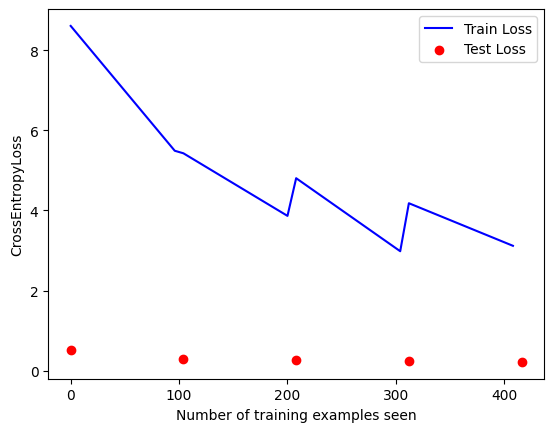

In [5]:
from language_model import train

trainer = train.ModelTrainer(model, train_data, test_data)

trainer.train()

In [6]:
model.predict(' ', 100)

'      most  kingnemicsocial debtor    Olympics :implementationas icula)   synthetic,      end Bo ZwingliL)       comInationing yon scorpus  leProtheMalay:ab V\\\\^\\\\{\\*        \\(LP      d   40cri \\\\{X\\\\}\\\\}\\[phiyog frequencyBER   d '

In [7]:
model.predict('Deep Learning', 100)

"Deep LearningpredominantlyousDalotuzumab canboxersme ent  Ill168    Wor Outrra   are:Valleythat   Atlantic           dx\\-diffuse wayOT  mede      re  au pe  or O'Neillproductcorrespon     organizationab   zed   p  ,p  :  espal"

In [8]:
#model.save('model.pt')